# Support Vector Machines

You can use sklearn API for this homework.

In [2]:
# used for manipulating directory paths
import os

import pandas as pd
# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize
import scipy
from scipy.spatial.distance import pdist, squareform
# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import nltk, nltk.stem.porter

from sklearn import svm


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## 1 Support Vector Machines (50 pts)

In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using support
vector machines to build a spam classifier.

### 1.1 Example Dataset 1 (20 pts)

We will begin with a 2D example dataset which can be separated by a linear boundary. In this dataset, the positions of the positive examples (indicated with `x`) and the negative examples (indicated with `o`) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example `x` on the far left at about (0.1, 4.1). As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

In [4]:
# Load from ex6data1
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\ex6data1.mat'))
X = data['X']
y = data['y'].flatten()
m = y.size

In [4]:
X.shape, y.shape

((51, 2), (51,))

In [5]:
np.unique(y)

array([0, 1], dtype=uint8)

### Binary Classification 

In [6]:
data1_df = pd.DataFrame(np.hstack((data['X'], data['y'])), columns = ["X1", "X2", 'Class'])
data1_df.head()

,X1,X2,Class
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


### 1.1.1 Plot Data (10 pts)

Define a function below to plot the data.

In [7]:
from matplotlib.pyplot import figure
plt.style.use('dark_background')

In [8]:
def plot_data(X, y):
    plt.figure()

    # ===================== Your Code Here =====================
    # Instructions : Plot the positive and negative examples on a
    #                2D plot, using the marker="+" for the positive
    #                examples and marker="o" for the negative examples
    #
    
    figure(num=None, figsize=(6, 4), dpi=90)
    plt.scatter(X[y==1 ,0], X[y==1, 1], marker='+', linewidth=3, label='positive', color = 'magenta')
    plt.scatter(X[y==0 ,0], X[y==0, 1], marker='o', linewidth=0.1, label='negative', color ='lawngreen') 
    plt.legend()

    # ===================== Your Code Here =====================
    

<Figure size 432x288 with 0 Axes>

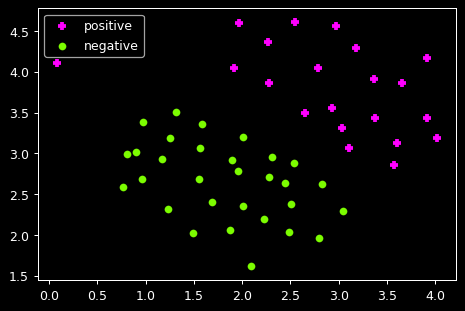

In [9]:
plot_data(X, y)

In this part of the exercise, you will try using different values of the $C$ parameter with SVMs. Informally, the $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $1/\lambda$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.


When $C=1$, you should find that the SVM puts the decision boundary in the gap between the two datasets and *misclassifies* the data point on the far left.

Your task is to try different values of $C$ on this dataset. Specifically, you should change the value of $C$ in the next cell to $C = 100$ and run the SVM training again. When $C = 100$, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not
appear to be a natural fit for the data.

### 1.1.2 Plot the decision boundary (10 pts)

Define a function below to plot the decision boundary.

First do a 
`pip install mlxtend` 
and then:

!pip install mlxtend

### `mlxtend` is a function for plotting decision regions of classifiers in 1 or 2 dimensions.

read more: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [10]:
def visualize_boundary(clf, X, y):

    # ===================== Your Code Here =====================
    from mlxtend.plotting import plot_decision_regions
    figure(num=None, figsize=(6, 4), dpi=100)
    plot_decision_regions(X, y, clf, legend=2)
    plt.title('SVM Decision Boundry')
    plt.show()
   
    # ===================== Your Code Here =====================

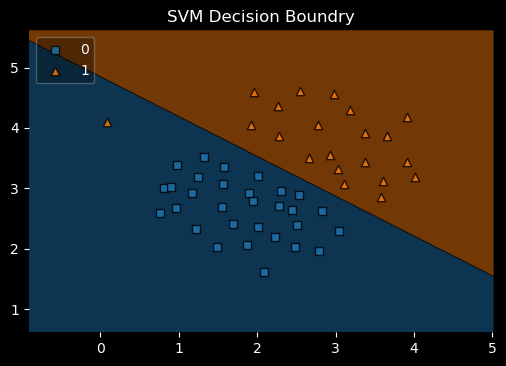

In [11]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
from sklearn.svm import SVC

C = 1
clf = SVC(C, kernel='linear', tol=1e-3)
clf.fit(X, y)
visualize_boundary(clf, X, y)

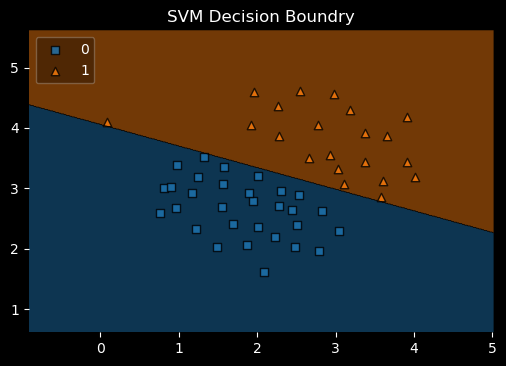

In [12]:
C = 100
clf_c100 = SVC(C, kernel='linear', tol=1e-3)
clf_c100.fit(X, y)
visualize_boundary(clf_c100, X, y)

### As you can see increasing $C$ will cause the classifier to put more emphasys on avoiding miss classification than having a larger margin!

- The decision boundry has moved toward the outlier to classify it more accurately

<a id="section1"></a>
### 1.2 SVM with Gaussian Kernels (30 pts)

In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

### 1.2.1 Gaussian Kernel (10 pts)

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
($x^{(i)}$, $x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.
You should now complete the code in `gaussianKernel` to compute the Gaussian kernel between two examples, ($x^{(i)}$, $x^{(j)}$). The Gaussian kernel function is defined as:

$$ K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$$
<a id="gaussianKernel"></a>

In [13]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    sim = 0
    # ====================== YOUR CODE HERE ======================
    return np.exp((-(np.linalg.norm(x1-x2)**2))/(2*sigma**2))

    # =============================================================
    return sim

### Given a matrix of X values, this cell calculates the similarity matrix with gaussian kernel

`import scipy
from scipy.spatial.distance import pdist, squareform
pairwise_dists = squareform(pdist(X, 'euclidean'))
sim = scipy.exp(-pairwise_dists**2 / (2*sigma**2))
sim`

In [14]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print(f'Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1],\n  sigma = {sigma:0.2f}\n {sim: 0.3f}')

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1],
  sigma = 2.00
  0.325


Once you have completed the function `gaussianKernel` the following cell will test your kernel function on two provided examples.

### 1.2.2 Example Dataset 2 (5 pts)

The next part in this notebook will load and plot dataset 2. 

<Figure size 432x288 with 0 Axes>

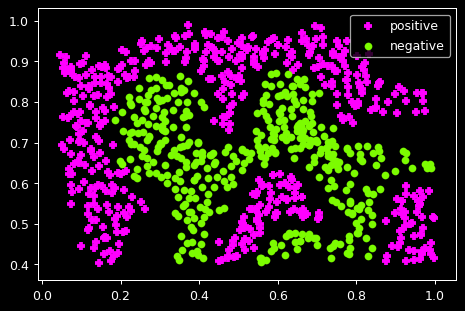

In [15]:
# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\ex6data2.mat'))
X = data['X']
y = data['y'].flatten()
m = y.size

# Plot training data
plot_data(X, y)

From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset. If you have correctly implemented the Gaussian kernel function, the following cell will proceed to train the SVM with the Gaussian kernel on this dataset.

You should get a decision boundary as shown in the figure below, as computed by the SVM with a Gaussian kernel. The decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well.

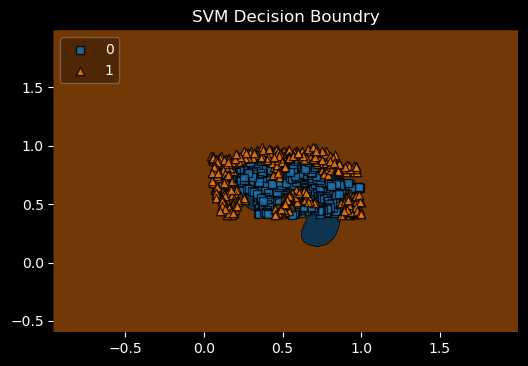

In [16]:
from sklearn.svm import SVC

clf = SVC(C=1, kernel='rbf')
clf.fit(X, y)
visualize_boundary(clf, X, y)

<a id="section2"></a>
### 1.2.3 Example Dataset 3 (15 pts)

In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The next cell will load and display a third dataset.

You will be using the SVM with the Gaussian kernel with this dataset. In the provided dataset, `ex6data3.mat`, you are given the variables `X`, `y`, `Xval`, `yval`. 

In [17]:
# Load from ex6data3
# You will have X, y, Xval, yval as keys in the dict data
data = loadmat(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\ex6data3.mat'))
X = data['X']
y = data['y'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()
m = y.size

### We should edit the cell above with this line of code: `yval = data['yval'].flatten()`

In [18]:
y.shape, yval.shape

((211,), (200,))

<Figure size 432x288 with 0 Axes>

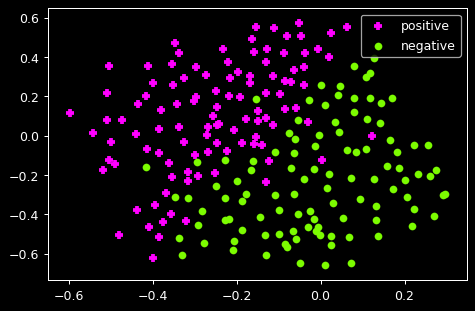

In [19]:
plot_data(X, y)

Your task is to use the cross validation set `Xval`, `yval` to determine the best $C$ and $\sigma$ parameter to use. For both $C$ and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for $C$ and $\sigma$ (e.g., $C = 0.3$ and $\sigma = 0.1$). For example, if you try each of the 8 values listed above for $C$ and for $\sigma^2$, you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different models. 

In [20]:
lowest_error = np.inf
best_params = np.zeros(2)
for C in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
    for sigma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
        clf = SVC(C, gamma=(1/(2*sigma**2))).fit(X, y)
        prediction  = clf.predict(Xval)
        current_error  = np.mean(prediction != yval )
        if current_error < lowest_error :
            lowest_error = current_error
            best_params = (C, sigma)

C, sigma = best_params[0], best_params[1]
print(f" lowest error is: {lowest_error}\n best C is: {C}\n and best sigma is: {sigma}")

 lowest error is: 0.035
 best C is: 1
 and best sigma is: 0.1


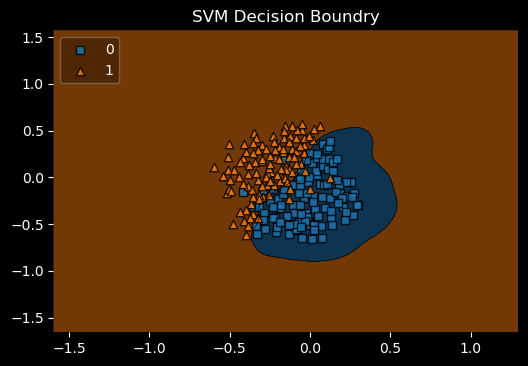

In [21]:
from sklearn.svm import SVC

C, sigma = best_params[0], best_params[1]
clf = SVC(C=C, gamma=(1/(2*sigma**2)),  kernel='rbf')
clf.fit(X, y)
visualize_boundary(clf, X, y)

<a id="section3"></a>
## 2 Spam Classification (50 pts)

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, $x$, is spam ($y = 1$) or non-spam ($y = 0$). In particular, you need to convert each email into a feature vector $x \in \mathbb{R}^n$ . The following parts of the exercise will walk you through how such a feature vector can be constructed from an email.

The dataset included for this exercise is based on a a subset of the [SpamAssassin Public Corpus](http://spamassassin.apache.org/old/publiccorpus/). For the purpose of this exercise, you will only be using the body of the email (excluding the email headers).

### 2.1 Preprocessing Emails (20 pts)

Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. The figure below shows a sample email that contains a URL, an email address (at the end), numbers, and dollar
amounts.

<img src="Figures/email.png" width="700px" />

While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g., the specific URL or specific dollar amount) will be different in almost every
email. Therefore, one method often employed in processing emails is to “normalize” these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the
email with the unique string “httpaddr” to indicate that a URL was present.

This has the effect of letting the spam classifier make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small. 

In the function `processEmail` below, we have implemented the following email preprocessing and normalization steps:

- **Lower-casing**: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).

- **Stripping HTML**: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.

- **Normalizing URLs**: All URLs are replaced with the text “httpaddr”.

- **Normalizing Email Addresses**:  All email addresses are replaced with the text “emailaddr”.

- **Normalizing Numbers**: All numbers are replaced with the text “number”.

- **Normalizing Dollars**: All dollar signs ($) are replaced with the text “dollar”.

- **Word Stemming**: Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.

- **Removal of non-words**: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

The result of these preprocessing steps is shown in the figure below. 

<img src="Figures/email_cleaned.png" alt="email cleaned" style="width: 600px;"/>

While preprocessing has left word fragments and non-words, this form turns out to be much easier to work with for performing feature extraction.

### 2.1.1 Vocabulary List (20 pts)

After preprocessing the emails, we have a list of words for each email. The next step is to choose which words we would like to use in our classifier and which we would want to leave out.

For this exercise, we have chosen only the most frequently occuring words as our set of words considered (the vocabulary list). Since words that occur rarely in the training set are only in a few emails, they might cause the
model to overfit our training set. The complete vocabulary list is in the file `vocab.txt` (inside the `Data` directory for this exercise) and also shown in the figure below.

<img src="Figures/vocab.png" alt="Vocab" width="150px" />

Our vocabulary list was selected by choosing all words which occur at least a 100 times in the spam corpus,
resulting in a list of 1899 words. In practice, a vocabulary list with about 10,000 to 50,000 words is often used.
Given the vocabulary list, we can now map each word in the preprocessed emails into a list of word indices that contains the index of the word in the vocabulary dictionary. The figure below shows the mapping for the sample email. Specifically, in the sample email, the word “anyone” was first normalized to “anyon” and then mapped onto the index 86 in the vocabulary list.

<img src="Figures/word_indices.png" alt="word indices" width="200px" />

Your task now is to complete the code in the function `processEmail` to perform this mapping. In the code, you are given a string `word` which is a single word from the processed email. You should look up the word in the vocabulary list `vocabList`. If the word exists in the list, you should add the index of the word into the `word_indices` variable. If the word does not exist, and is therefore not in the vocabulary, you can skip the word.

In [22]:
def get_vocab_list():
    vocab_dict = {}
    with open(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\vocab.txt')) as f:
        for line in f:
            (val, key) = line.split()
            vocab_dict[int(val)] = key

    return vocab_dict

### Printing the first 10 elements of the vocab dictionary

In [23]:
import itertools 

d = get_vocab_list()
x = list(itertools.islice(d.items(), 0, 10))
x

[(1, 'aa'),
 (2, 'ab'),
 (3, 'abil'),
 (4, 'abl'),
 (5, 'about'),
 (6, 'abov'),
 (7, 'absolut'),
 (8, 'abus'),
 (9, 'ac'),
 (10, 'accept')]

In [24]:
def processEmail(email_contents, verbose=True):
    
    # Load Vocabulary
    vocab_list = get_vocab_list()

    # Init return value
    word_indices = [] #list is faster to append than numpy array

    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find(chr(10) + chr(10))
    # email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
    # Stem the email contents word by word
    stemmer = nltk.stem.porter.PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue
    
        # Look up the word in the dictionary and add to word_indices if found
        # ====================== YOUR CODE HERE ======================
    
        for key,value in vocab_list.items():
        #for word in processed_email:
            if word == value:
                word_indices.append(key)

        # =============================================================

    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    word_indices = np.array(word_indices) #convert back the list to a numpy array
    return word_indices, processed_email

Once you have implemented `processEmail`, the following cell will run your code on the email sample and you should see an output of the processed email and the indices list mapping.

In [25]:
%%time
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

# Extract Features
with open(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices, processed_email  = processEmail(file_contents)

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[  86  916  794 1077  883  370 1699  790 1822 1831  883  431 1171  794
 1002 1895  592 1676  238  162   89  688  945 1663 1120 1062 1699  375
 1162  477 1120 1893 1510  799 1182 1237  512 1120  810 1895 1440 1547
  181 1699 1758 1896  688 1676  992  961 1477   71  530 1699  531]
Wall time: 13 ms


### To check the result:

In [26]:
print(f" The first element of processesd email is:   {processed_email[0]}\n which is \
corresponding to element {word_indices[0]} on the vocablist which is: {get_vocab_list()[word_indices[0]]}")  

 The first element of processesd email is:   anyon
 which is corresponding to element 86 on the vocablist which is: anyon


<a id="section4"></a>
### 2.2 Extracting Features from Emails (10 pts)

You will now implement the feature extraction that converts each email into a vector in $\mathbb{R}^n$. For this exercise, you will be using n = # words in vocabulary list. Specifically, the feature $x_i \in \{0, 1\}$ for an email corresponds to whether the $i^{th}$ word in the dictionary occurs in the email. That is, $x_i = 1$ if the $i^{th}$ word is in the email and $x_i = 0$ if the $i^{th}$ word is not present in the email.

Thus, for a typical email, this feature would look like:

$$ x = \begin{bmatrix} 
0 & \dots & 1 & 0 & \dots & 1 & 0 & \dots & 0 
\end{bmatrix}^T \in \mathbb{R}^n
$$

You should now complete the code in the function `emailFeatures` to generate a feature vector for an email, given the `word_indices`.
<a id="emailFeatures"></a>

In [27]:
def emailFeatures(word_indices):
    """
    Takes in a word_indices vector and produces a feature vector from the word indices. 
    
    Parameters
    ----------
    word_indices : list
        A list of word indices from the vocabulary list.
    
    Returns
    -------
    x : list 
        The computed feature vector.
    
    Instructions
    ------------
    Fill in this function to return a feature vector for the
    given email (word_indices). To help make it easier to  process 
    the emails, we have have already pre-processed each email and converted
    each word in the email into an index in a fixed dictionary (of 1899 words).
    The variable `word_indices` contains the list of indices of the words 
    which occur in one email.
    
    Concretely, if an email has the text:

        The quick brown fox jumped over the lazy dog.

    Then, the word_indices vector for this text might look  like:
               
        60  100   33   44   10     53  60  58   5

    where, we have mapped each word onto a number, for example:

        the   -- 60
        quick -- 100
        ...

    Note
    ----
    The above numbers are just an example and are not the actual mappings.

    Your task is take one such `word_indices` vector and construct
    a binary feature vector that indicates whether a particular
    word occurs in the email. That is, x[i] = 1 when word i
    is present in the email. Concretely, if the word 'the' (say,
    index 60) appears in the email, then x[60] = 1. The feature
    vector should look like:
        x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..]
    """
    # Total number of words in the dictionary
    n = 1899

    # You need to return the following variables correctly.
    x = np.zeros(n)

    # ===================== YOUR CODE HERE ======================
    x[word_indices] = 1
    # ===========================================================
    
    return x

Once you have implemented `emailFeatures`, the next cell will run your code on the email sample. 

In [28]:
# Extract Features
with open(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices, processed_email   = processEmail(file_contents)
features      = emailFeatures(word_indices)

# Print Stats
print('\nLength of feature vector: %d' % len(features))
print('Number of non-zero entries: %d' % sum(features > 0))

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

Length of feature vector: 1899
Number of non-zero entries: 45


In [29]:
np.unique(features)

array([0., 1.])

### 2.3 Training SVM for Spam Classification (20 pts)

In the following section we will load a preprocessed training dataset that will be used to train a SVM classifier. The file `spamTrain.mat` (within the `Data` folder for this exercise) contains 4000 training examples of spam and non-spam email, while `spamTest.mat` contains 1000 test examples. Each
original email was processed using the `processEmail` and `emailFeatures` functions and converted into a vector $x^{(i)} \in \mathbb{R}^{1899}$.

After loading the dataset, the next cell proceed to train a linear SVM to classify between spam ($y = 1$) and non-spam ($y = 0$) emails. 

In [30]:
# Load the Spam Email dataset
# You will have X, y in your environment

data = loadmat(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\spamTrain.mat'))
X = data['X']
y = data['y'].flatten()

In [31]:
X[1].shape

(1899,)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [33]:
X_train.shape, y_train.shape

((2800, 1899), (2800,))

In [34]:
X_test.shape, y_test.shape

((1200, 1899), (1200,))

In [35]:
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter=2000 )

In [36]:
from sklearn.model_selection import GridSearchCV, cross_validate
 
param_grid = {'penalty': ['l2','l1'],
              'C' :  [0.01, 0.05, 0.1, 1]}
              
grid = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, return_train_score=True )

In [37]:
grid.fit(X_train, y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=2000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 1], 'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [38]:
grid.best_params_

{'C': 0.05, 'penalty': 'l2'}

In [39]:
scores = cross_validate(grid, X, y, scoring = 'roc_auc', return_train_score=True, n_jobs=-1 )
df_scores = pd.DataFrame(scores)
df_scores.mean()

fit_time       6.797831
score_time     0.039276
test_score     0.996490
train_score    0.999999
dtype: float64

,fit_time,score_time,test_score,train_score
0,8.306823,0.054856,0.995656,0.999999
1,6.814928,0.085672,0.997365,1.000000
2,8.061454,0.027926,0.996848,0.999999
3,7.474036,0.013962,0.997568,1.000000
4,3.331915,0.013963,0.995013,1.000000


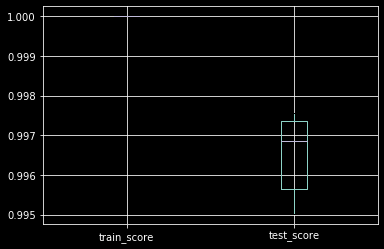

In [40]:
df_scores[['train_score', 'test_score' ]].boxplot()
df_scores

### Score without cross validation

In [41]:
print(f"Accuracy score for {grid.__class__.__name__} is: {grid.score(X_test, y_test):0.3f}")

Accuracy score for GridSearchCV is: 0.974


### 2.4 Optional (ungraded) exercise: Try your own emails

Now that you have trained a spam classifier, you can start trying it out on your own emails. In the starter code, we have included two email examples (`emailSample1.txt` and `emailSample2.txt`) and two spam examples (`spamSample1.txt` and `spamSample2.txt`). You should now try the examples we have provided and see if the classifier gets them right. You can also try your own emails by replacing the examples (plain text files) with your own emails.

In [42]:
with open(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices, processed_email   = processEmail(file_contents)
features      = emailFeatures(word_indices)

grid.predict(features.reshape(1,1899))
print("------------------------------------------")
print(f"The prediction for emailSample1 is class: {grid.predict(features.reshape(1,-1))} ")

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
------------------------------------------
The prediction for emailSample1 is class: [0] 


In [43]:
with open(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\emailSample2.txt')) as fid:
    file_contents = fid.read()

word_indices2, processed_email  = processEmail(file_contents)
features2      = emailFeatures(word_indices2)


print("------------------------------------------")
print(f"The prediction for emailSample2 is class: {grid.predict(features2.reshape(1,-1))} ")

----------------
Processed email:
----------------
folk my first time post  have a bit of unix experi but am new to linux just got a new pc at home  dell box with window xp ad a second hard disk for linux partit the disk and have instal suse number number from cd which went fine except it didnt pick up my monitor i have a dell brand e number fpp number lcd flat panel monitor and a nvidia geforc number ti number video card both of which are probabl too new to featur in suse default set i download a driver from the nvidia websit and instal it use rpm then i ran sax number as wa recommend in some post i found on the net but it still doesnt featur my video card in the avail list what next anoth problem i have a dell brand keyboard and if i hit capslock twice the whole machin crash in linux not window  even the on off switch is inact leav me to reach for the power cabl instead if anyon can help me in ani way with these prob id be realli grate  ive search the net but have run out of idea or 

In [44]:
with open(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\spamSample1.txt')) as fid:
    file_contents = fid.read()

word_indices3, processed_email   = processEmail(file_contents)
features3      = emailFeatures(word_indices3)

print("------------------------------------------")
print(f"The prediction for spamSample1 is class: {grid.predict(features3.reshape(1,-1))} ")

----------------
Processed email:
----------------
do you want to make dollar number or more per week if you are a motiv and qualifi individu  i will person demonstr to you a system that will make you dollar number number per week or more thi is not mlm call our number hour prerecord number to get the detail number  number  number i need peopl who want to make seriou money make the call and get the fact invest number minut in yourself now number  number  number look forward to your call and i will introduc you to peopl like yourself who are current make dollar number number plu per week number  number  number number ljgv number  number lean number lrm number  number wxho number qiyt number  number rjuv number hqcf number  number eidb number dmtvl number
------------------------------------------
The prediction for spamSample1 is class: [0] 


In [45]:
with open(os.path.join('Data', r'C:\Users\Behnam\Downloads\Python\Datasets\ML_HW4\spamSample2.txt')) as fid:
    file_contents = fid.read()

word_indices4, processed_email  = processEmail(file_contents)
features4      = emailFeatures(word_indices4)

print("------------------------------------------")
print(f"The prediction for spamSample2 is class: {grid.predict(features4.reshape(1,-1))} ")

----------------
Processed email:
----------------
best buy viagra gener onlin viagra number mg x number pill dollar number free pill reorder discount top sell number qualiti satisfact guarante we accept visa master echeck payment number satisfi custom httpaddr
------------------------------------------
The prediction for spamSample2 is class: [1] 
